### Author : Vaishnav Krishna P 
#### Dataset link: https://www.kaggle.com/datasets/rishidamarla/heart-disease-prediction?rvi=1
##### About Dataset : Context: The leading cause of death in the developed world is heart disease. Therefore there needs to be work done to help prevent the risks of of having a heart attack or stroke.

* Content: Use this dataset to predict which patients are most likely to suffer from a heart disease in the near future using the features given.

* Acknowledgement: This data comes from the University of California Irvine's Machine Learning Repository at https://archive.ics.uci.edu/ml/datasets/Heart+Disease.

In [614]:
# Importing the necessory dependencies 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
%matplotlib inline 

# ignoring the unnecessory warnings
import warnings
warnings.filterwarnings(action='ignore')

# module for train_test_split 
from sklearn.model_selection import train_test_split

# library for sclaing
from sklearn.preprocessing import MinMaxScaler

# importing the logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# model evaluation library 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# library for pikling 
import pickle

In [579]:
# Loading the dataset 
df = pd.read_csv('Heart_Disease_Prediction.csv')

In [580]:
# First five rows of the dataframe 
df.head(n=5)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [581]:
# shape of the dataframe 
df.shape 

(270, 14)

In [582]:
# information about the datset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

### EDA 
1. Details about the features in the dataframe 
2. Missing value analysis 
3. Numerical feature analysis 
4. categorical feature analysis 
5. corelation analysis 
6. outlier analysis(Box plot)
7. Data visulisation
8. whether the dataframe is balanced or not 
9. Checking for duplicate values 

### Details about the features in the dataframe 
1. Age 
2. Sex (1-male & 0-female)
3. Chest pain type - range of values range from 1-4 
4. BP - blood pressure levels(94-200)
5. Cholestrol - cholestrol level range from 126 - 564
6. FBS over 120 - The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
7. EKG results - 0-2 
8. Max HR - maximum heart rate (71-202)
9. Exercise angina - detection of angina(1-presence & 2 - absence)
10. ST depression - Range from 0 to 6 
11. Slope of ST - range from 1- 3 
12. Number of vessels fluro - range from 0 to 3
13. Thallium - 3,6,7 
14. Heart Disease - target feature 

### Misssing value analysis 
* heatmap for the visulisation of number of missing values in each features 

In [583]:
# No of missing values in each features 
df.isna().sum(axis=0)

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

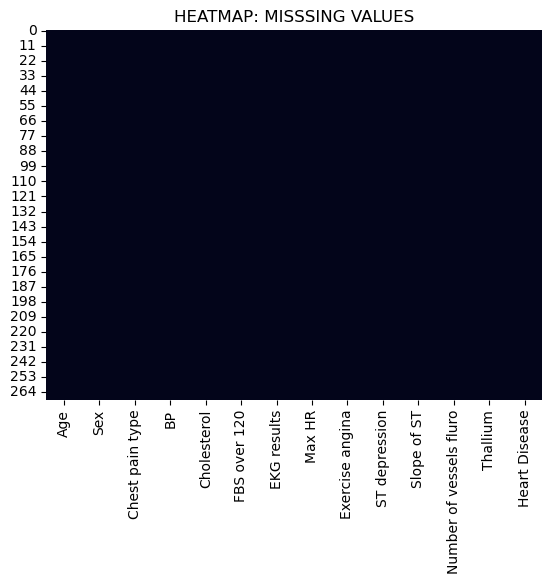

In [584]:
# heatmap 
plt.title("HEATMAP: MISSSING VALUES")
sns.heatmap(df.isna(),annot=False,cbar=False)
plt.show()

In [585]:
# Checking wheather any of the rows are duplicated 
df.duplicated().sum()

0

#### NUMERICAL FEATURE ANALYSIS 

In [586]:
# Numerical features 
Numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
Numerical_features

['Age',
 'Sex',
 'Chest pain type',
 'BP',
 'Cholesterol',
 'FBS over 120',
 'EKG results',
 'Max HR',
 'Exercise angina',
 'ST depression',
 'Slope of ST',
 'Number of vessels fluro',
 'Thallium']

In [587]:
# data types of each features 
df[Numerical_features].dtypes

Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
dtype: object

In [588]:
# description about the values in the dataframe of the Numerical features 
df[Numerical_features].describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


#### CATEGORICAL FEATURE ANALYSIS 

In [589]:
# Categorical feature analysis 
Categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
Categorical_features

['Heart Disease']

#### CORELATION ANALYSIS
* Plotting a heat map for the visulisation of the corelation between the features 

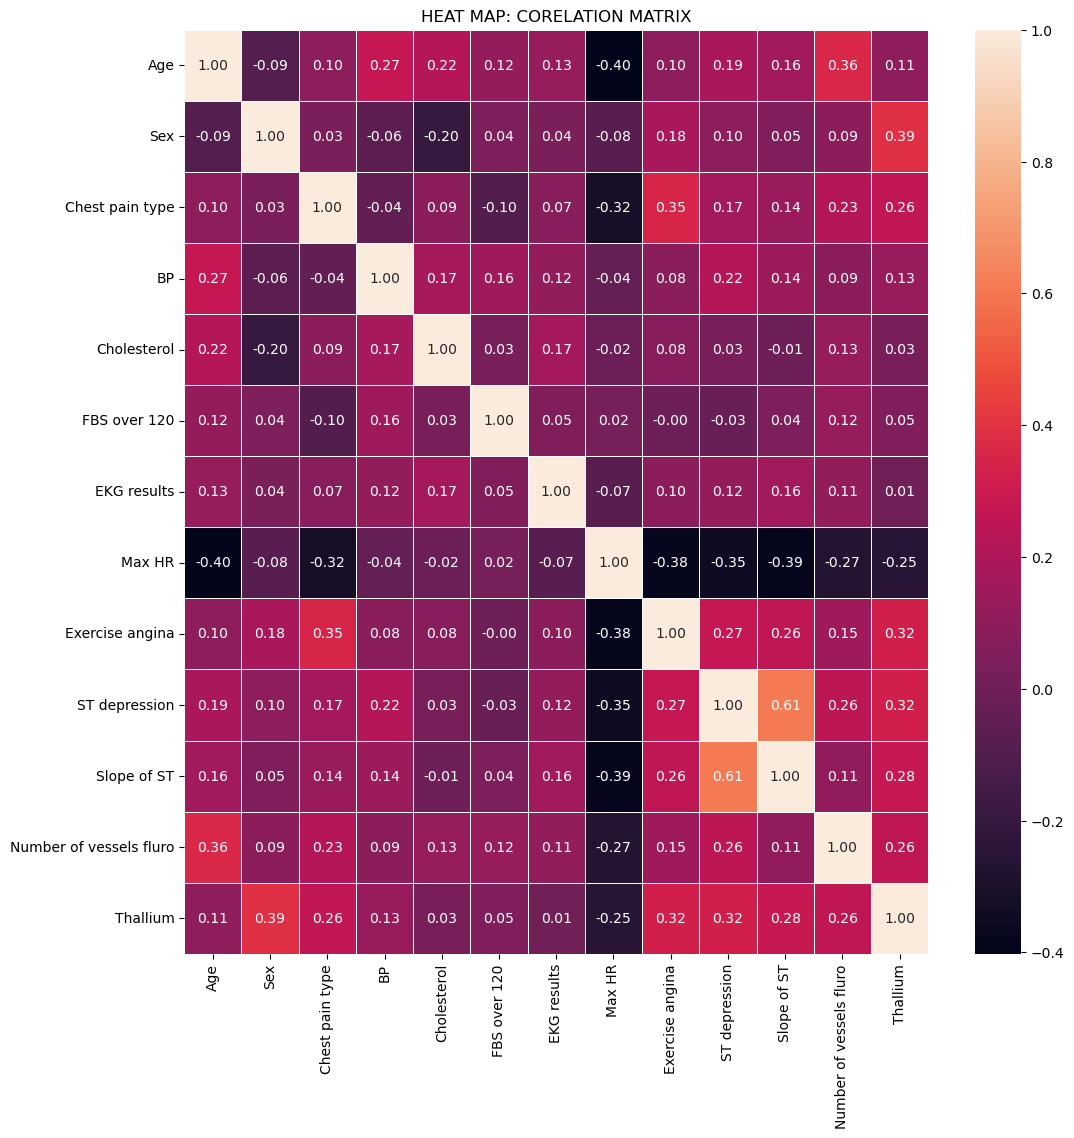

In [590]:
# Plotting the heatmap 
plt.figure(figsize=(12,12))
plt.title("HEAT MAP: CORELATION MATRIX")
sns.heatmap(df.corr(), annot=True, cbar=True, linewidth=0.5, fmt='0.2f',center=None,
           )
plt.show()

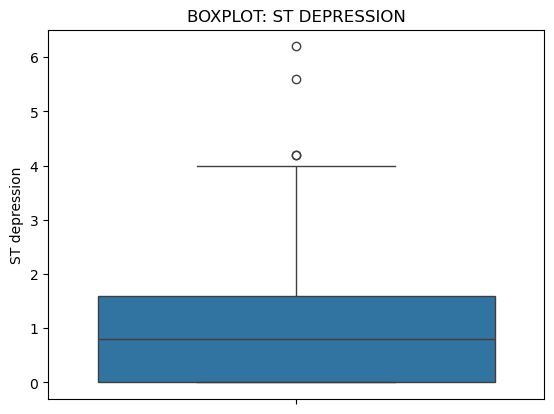

In [591]:
# boxplot of ST depression
plt.title("BOXPLOT: ST DEPRESSION")
sns.boxplot(data=df['ST depression'])
plt.show()

##### EDA INFO:
* From the above analysis, we understood that none of the features have missing values.
* All the rows are unique.there is no duplicated rows in the data frame 
* All the feature execpt the target feature is numeric 
* Slope of ST and ST depression is a multicolinear feature (0.61)
* MAX HR - is multicolinear to many features 
* ST depression is the only continous feature in the dataframe 

### DATA VISULISATION

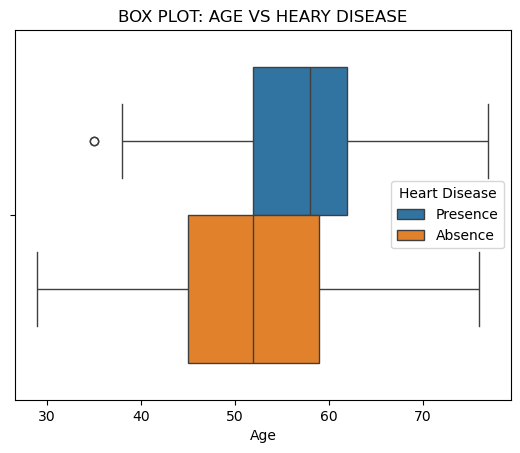

In [592]:
# boxplot to visualise the distribution of age over heart disease 
plt.title("BOX PLOT: AGE VS HEARY DISEASE")
sns.boxplot(data=df,x='Age',hue='Heart Disease')
plt.show()

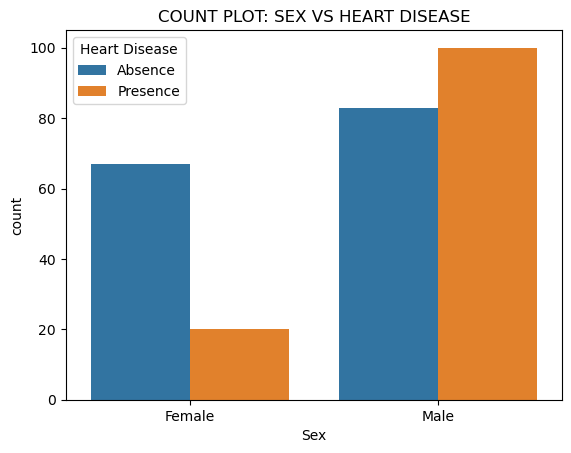

In [593]:
# Count plot to understand the involvment of sex in heart disease 
plt.title("COUNT PLOT: SEX VS HEART DISEASE")
sns.countplot(data=df,x='Sex',hue='Heart Disease',saturation=0.75)
plt.xticks([0,1],['Female','Male'])
plt.show()

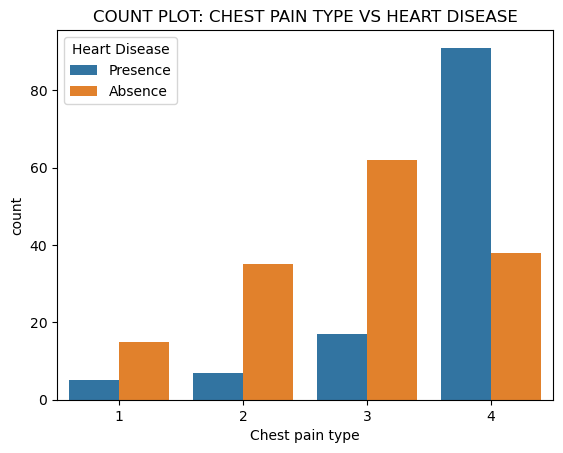

In [594]:
plt.title("COUNT PLOT: CHEST PAIN TYPE VS HEART DISEASE")
sns.countplot(data=df,x='Chest pain type',hue='Heart Disease',saturation=0.75)
plt.show()

In [595]:
# Splitting the data frames 
df_presence = df[df['Heart Disease'] == "Presence"]
df_absence = df[df['Heart Disease'] == "Absence"]

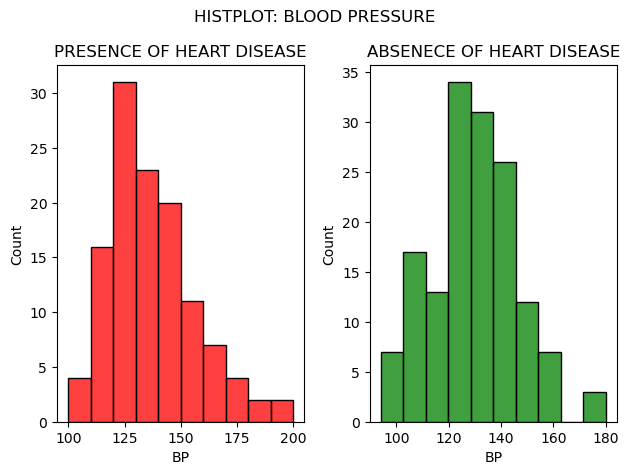

In [596]:
# Side by side histplot 
plt.suptitle("HISTPLOT: BLOOD PRESSURE")
plt.subplot(1,2,1)
plt.title("PRESENCE OF HEART DISEASE")
sns.histplot(data = df_presence['BP'],color='r',bins=10)
plt.subplot(1,2,2)
plt.title("ABSENECE OF HEART DISEASE")
sns.histplot(data = df_absence['BP'],color='g',bins=10)
plt.tight_layout()
plt.show()

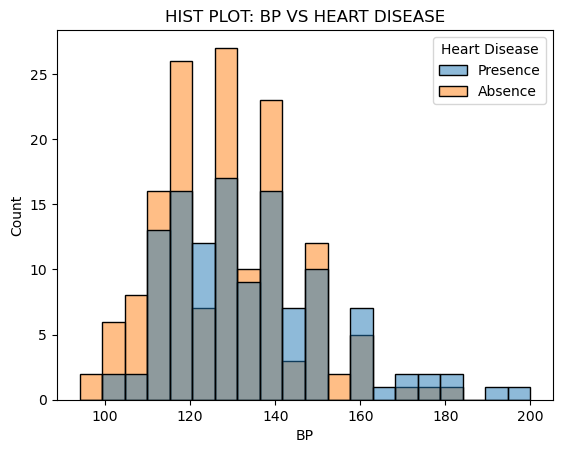

In [597]:
# histplot 
plt.title("HIST PLOT: BP VS HEART DISEASE")
sns.histplot(data=df,x='BP',hue='Heart Disease',bins=20)
plt.show()

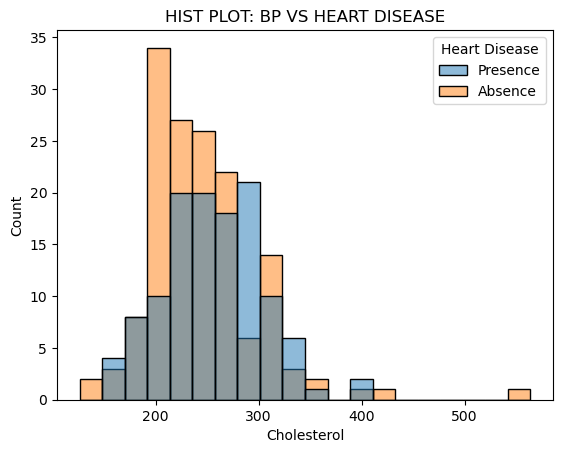

In [598]:
plt.title("HIST PLOT: BP VS HEART DISEASE")
sns.histplot(data=df,x='Cholesterol',hue='Heart Disease',bins=20)
plt.show()

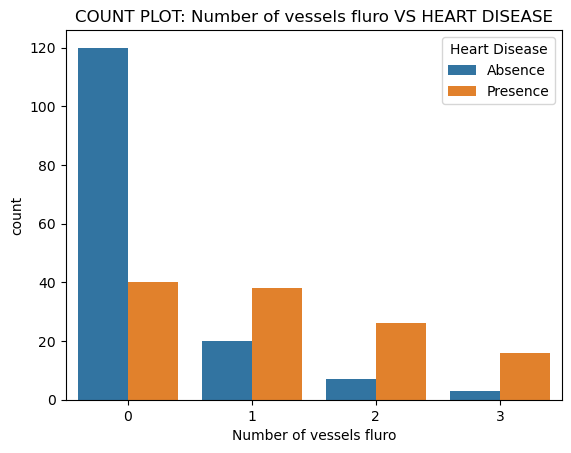

In [599]:
plt.title("COUNT PLOT: Number of vessels fluro VS HEART DISEASE")
sns.countplot(data=df,x='Number of vessels fluro',hue='Heart Disease',saturation=0.75)
plt.show()

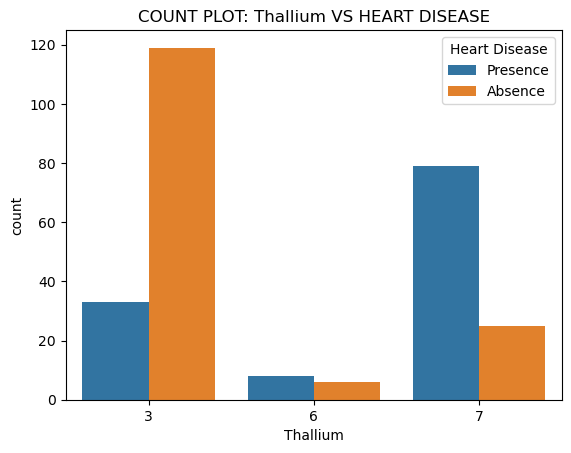

In [600]:
plt.title("COUNT PLOT: Thallium VS HEART DISEASE")
sns.countplot(data=df,x='Thallium',hue='Heart Disease',saturation=0.75)
plt.show()

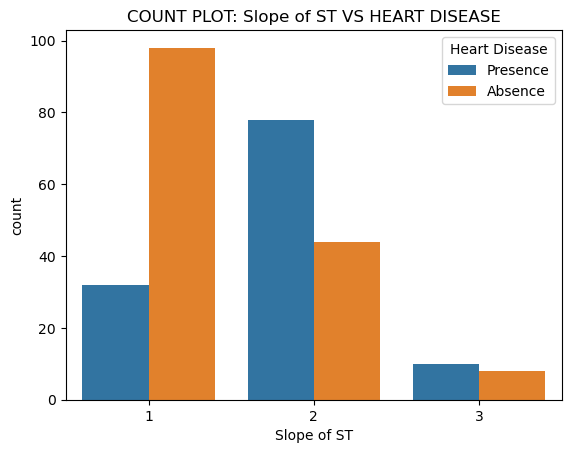

In [601]:
plt.title("COUNT PLOT: Slope of ST VS HEART DISEASE")
sns.countplot(data=df,x='Slope of ST',hue='Heart Disease',saturation=0.75)
plt.show()

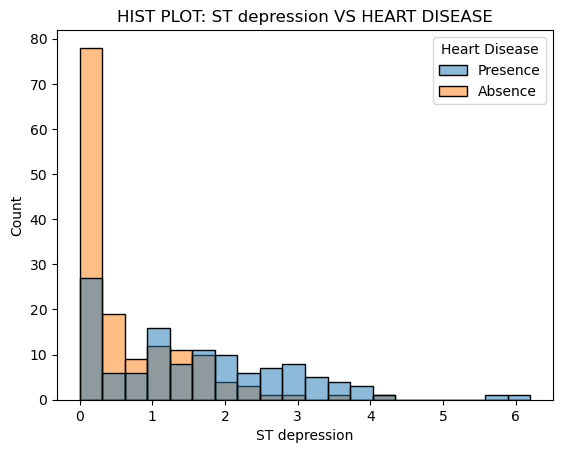

In [602]:
plt.title("HIST PLOT: ST depression VS HEART DISEASE")
sns.histplot(data=df,x='ST depression',hue='Heart Disease',bins=20)
plt.show()

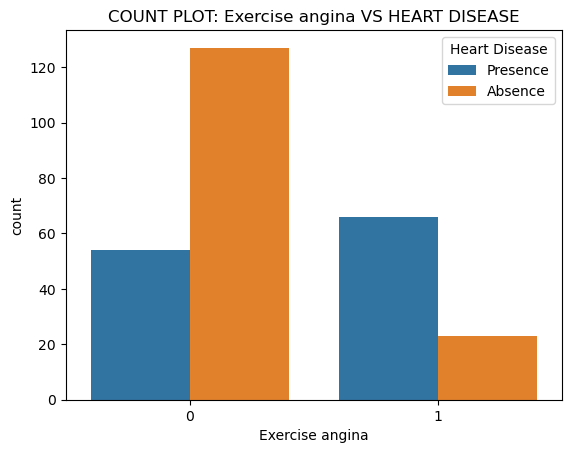

In [603]:
plt.title("COUNT PLOT: Exercise angina VS HEART DISEASE")
sns.countplot(data=df,x='Exercise angina',hue='Heart Disease',saturation=0.75)
plt.show()

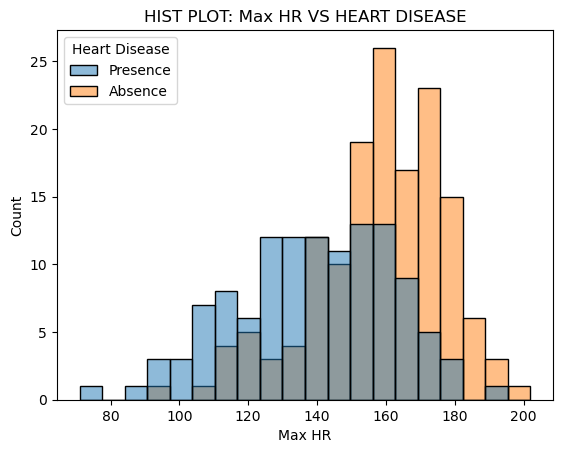

In [604]:
plt.title("HIST PLOT: Max HR VS HEART DISEASE")
sns.histplot(data=df,x='Max HR',hue='Heart Disease',bins=20)
plt.show()

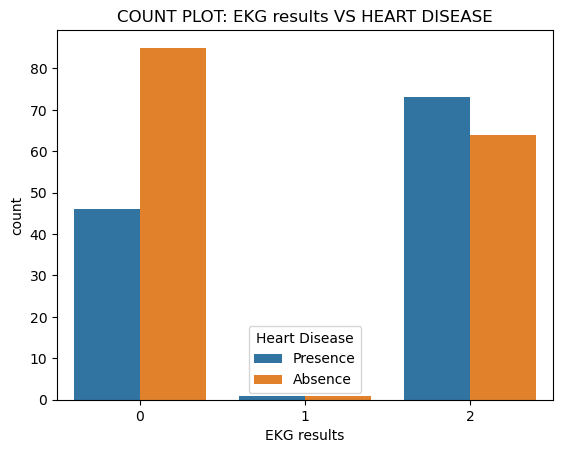

In [605]:
plt.title("COUNT PLOT: EKG results VS HEART DISEASE")
sns.countplot(data=df,x='EKG results',hue='Heart Disease',saturation=0.75)
plt.show()

##### DATA VISUALISATION INFO:
* people with age more than 50 highly prone to the heart disease. 
* Males are more infected to heart disease than the females.
* if the chest pain level is 4,there is a high chance that patient can cause heart disease.
* Person having high blood presssure are very highly prone to heart disease.
* cholestrol level of 275-300 is likely a level of person with heart disease.
* if the number of vessel is 1 to 3,there is a high chance of heart disease.
* If the Thalium level is 3, high chance to heart disease.
* if the slope of ST is 1, highly favour to heart disease.
* from the histogram,if the ST depression is high high chance of getting heart disease.
* presence of Exercise angina is an indicative of heart disease.
* if max heart rate is less than 145,high chances of having heart disease.
* when EKG result is 3, more likely to have heart disease.

#### DATA CLEANING 
* Since, the dataset is free from the missing values and the noises.No need of handling the missing values and the noises.

#### DATA TRANSFORMATION
* Since, all the features exept the target feature is numerical no need of encoding.
* majority of the features are int data types.no need of scaling 

In [606]:
# Encoding the Target feature 
df['Heart Disease'] = df['Heart Disease'].map({'Presence':1,'Absence':0})

In [607]:
df.head(n=3)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1


#### CORELATION MATRIX

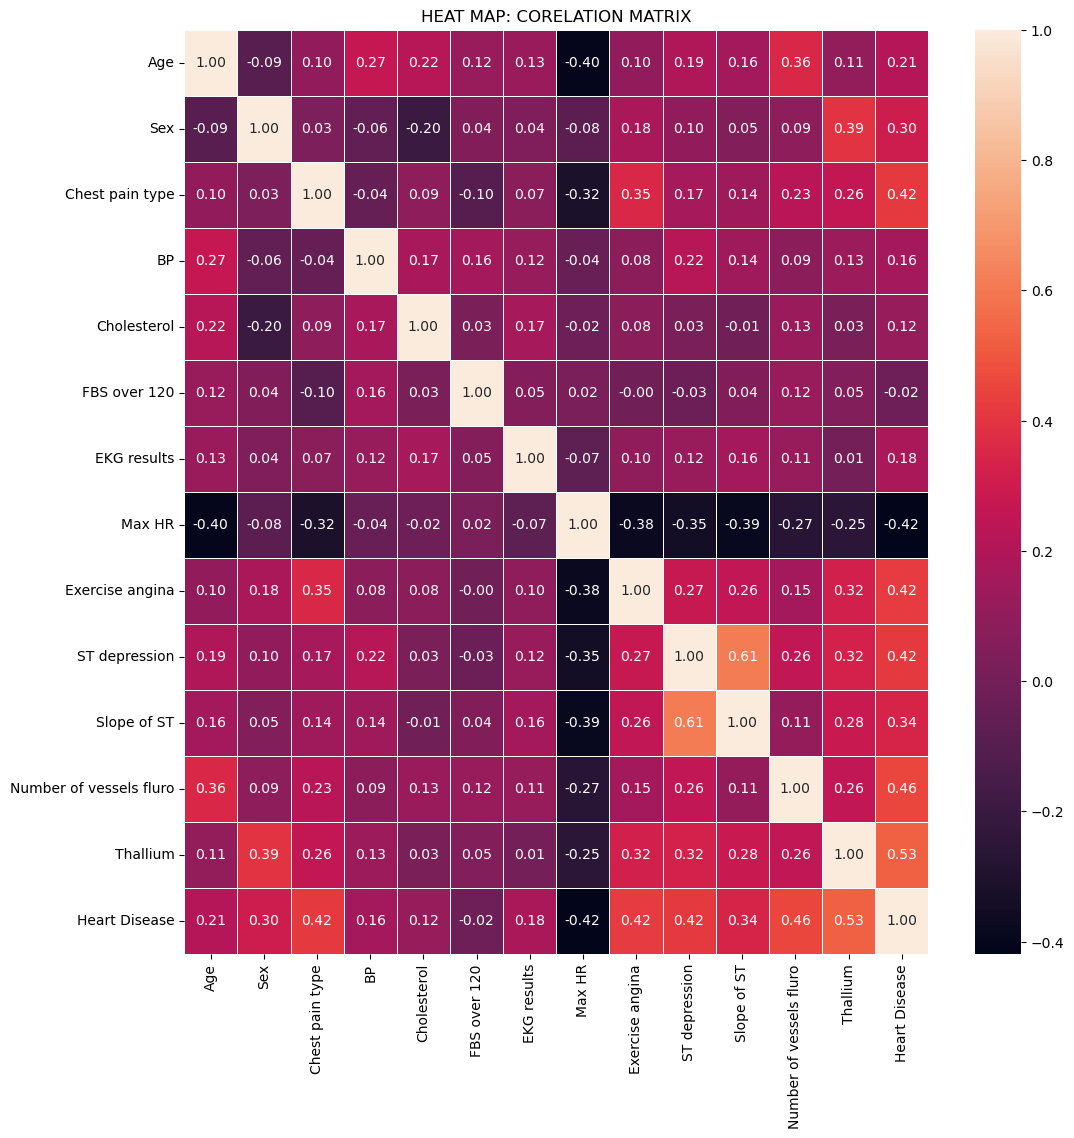

In [608]:
# Plotting the heatmap 
plt.figure(figsize=(12,12))
plt.title("HEAT MAP: CORELATION MATRIX")
sns.heatmap(df.corr(), annot=True, cbar=True, linewidth=0.5, fmt='0.2f',center=None,
           )
plt.show()

#### DATA REDUCTION

In [609]:
# Removing the unnecessory features and multicolinear features 
features_to_remove = ['Max HR','Slope of ST','FBS over 120']

df.drop(columns=features_to_remove, inplace=True)

In [610]:
df.head(n=5)

,Age,Sex,Chest pain type,BP,Cholesterol,EKG results,Exercise angina,ST depression,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,2,0,2.4,3,3,1
1,67,0,3,115,564,2,0,1.6,0,7,0
2,57,1,2,124,261,0,0,0.3,0,7,1
3,64,1,4,128,263,0,1,0.2,1,7,0
4,74,0,2,120,269,2,1,0.2,1,3,0


#### SCALING

In [611]:
features_to_scale = ['Age','BP','Cholesterol','ST depression']
hd_scaler = MinMaxScaler()

df[features_to_scale] = hd_scaler.fit_transform(df[features_to_scale])

In [616]:
with open('hd_scaler_model.pkl','wb') as file:
    pickle.dump(hd_scaler,file)

#### SPLITTING THE DATASET 

In [617]:
X = df.drop(columns=['Heart Disease'])
y = df['Heart Disease']

In [618]:
X.shape,y.shape

((270, 10), (270,))

In [619]:
# Train test split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,

                                                 random_state=42,shuffle=True)

In [620]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((216, 10), (54, 10), (216,), (54,))

#### MODEL TRAINING USING LOGISTIC REGRESSION

In [621]:
# model training using logistic regression
hd_model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [622]:
with open('hd_model.pkl','wb') as file:
    pickle.dump(hd_model,file)

In [623]:
y_pred = model.predict(X_test)

#### MODEL EVALUATION
* modelevaluation using accuracy_score,confusion_matrix,classification_report

In [624]:
# Evaluation of the model 
print("Accuracy_score: ",accuracy_score(y_pred,y_test))

print("CLASSIFICTION REPORT \n:",classification_report(y_pred,y_test))

Accuracy_score:  0.9074074074074074
CLASSIFICTION REPORT 
:               precision    recall  f1-score   support

           0       0.97      0.89      0.93        36
           1       0.81      0.94      0.87        18

    accuracy                           0.91        54
   macro avg       0.89      0.92      0.90        54
weighted avg       0.92      0.91      0.91        54



[]

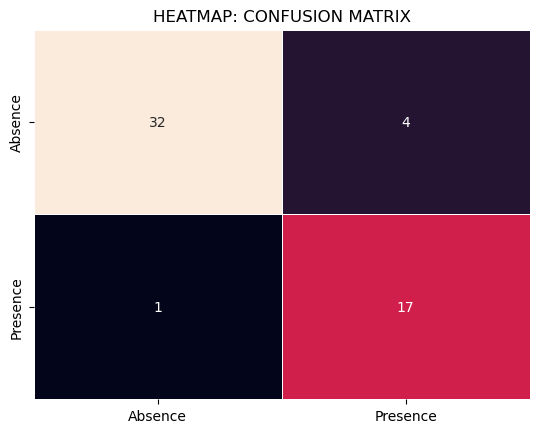

In [625]:
plt.title("HEATMAP: CONFUSION MATRIX")
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,cbar=False,linewidth=0.5)
plt.xticks([0.5,1.5],['Absence','Presence'])
plt.yticks([0.5,1.5],['Absence','Presence'])
plt.plot()

* So,our moel is performing well and we got a accuracy of 90%+